In [1]:
import torch
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot
import numpy as np

/home/mich/miniconda3/envs/calorie/lib/python3.9/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
/home/mich/miniconda3/envs/calorie/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/mich/miniconda3/envs/calorie/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
config_file = '../models/segmentation/config.py'
checkpoint_file = '../models/segmentation/iter_160000.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file)

/home/mich/miniconda3/envs/calorie/lib/python3.9/site-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/mich/miniconda3/envs/calorie/lib/python3.9/site-packages/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ../models/segmentation/iter_160000.pth


/home/mich/miniconda3/envs/calorie/lib/python3.9/site-packages/mmengine/runner/checkpoint.py:347: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filen

In [12]:
# test a single image
img = '../media/t3.jpg'
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)
result = inference_model(model, img)

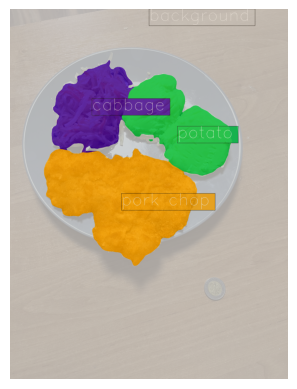

In [13]:
# show the results
vis_result = show_result_pyplot(model, img, result, show=False,opacity=0.8)
plt.axis('off')

plt.imshow(vis_result)
plt.savefig("test.png", bbox_inches='tight')

In [6]:
# maska segmentacji w postaci macierzy numpy
pred_mask = result.pred_sem_seg.data.cpu().numpy()
# pred_mask = result.pred_sem_seg.data.numpy() # for cpu

In [8]:
type(pred_mask)

numpy.ndarray

In [9]:
type(result)

mmseg.structures.seg_data_sample.SegDataSample

In [7]:
unique, counts = np.unique(pred_mask, return_counts=True)

In [8]:
print(np.asarray((unique, counts)).T)

[[       0 11498319]
 [      32   688915]
 [      65     5227]
 [      96      307]]
